In [1]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding

# machine learning
import sklearn                       # for data prep and classical ML

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")

# misc
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

# stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [2]:
# Load Dataset

file_path = "/Users/Sebastiano/SLE/Clinical_MRI.xlsx"
db = pd.read_excel(file_path)

print("N° of patients: {}".format(len(db)))
print("N° of columns: {}".format(db.shape[1]))
db.head()

N° of patients: 27
N° of columns: 969


,Patient,Date of Birth,Gender,Education,Disease duration (months),Age,SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),...,FO left thickness mm,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry
0,Paziente 1,30084,0,High School,109.5,38.00,0,0.0,1,1,...,2.2623,0.021072,18.2292,2.4475,0.022797,2.2930,0.021358,2.5970,0.024190,-12.4336
1,Paziente 2,26505,0,University,96.0,41.17,13,2.1,0,1,...,1.8574,0.017152,-18.2462,1.3628,0.012585,1.2929,0.011940,1.4317,0.013222,-10.1909
2,Paziente 3,31954,0,University,76.5,32.00,2,0.5,0,1,...,2.6216,0.024634,6.8561,2.3106,0.021711,2.4840,0.023341,2.1159,0.019882,16.0040
3,Paziente 4,32438,0,University,79.1,31.00,2,0.0,1,1,...,3.0341,0.028616,-6.5858,2.1641,0.020410,2.2997,0.021689,2.0193,0.019045,12.9849
4,Paziente 5,28445,0,high school,42.0,43.00,2,0.4,0,1,...,3.9152,0.035652,-10.4521,2.5960,0.023640,2.5593,0.023305,2.6209,0.023866,-2.3788


## Stats for age, gender and disease duration


In [3]:
# calculate statistics for age
age_mean = db['Age'].mean()
age_std = db['Age'].std()
age_min = db['Age'].min()
age_max = db['Age'].max()
# calculate statistics for gender
gender_counts = db['Gender'].value_counts()
male_count = gender_counts[1]
female_count = gender_counts[0]
# calculate statistics for disease duration
disease_dur_mean = db['Disease duration (months)'].mean()
disease_dur_std = db['Disease duration (months)'].std()
disease_dur_min = db['Disease duration (months)'].min()
disease_dur_max = db['Disease duration (months)'].max()
# print out the results
print('Age Mean:', age_mean)
print('Age Std:', age_std)
print('Age Min:', age_min)
print('Age Max:', age_max)
print('Male Count:', male_count)
print('Female Count:', female_count)
print('Disease Duration Mean:', disease_dur_mean)
print('Disease Duration Std:', disease_dur_std)
print('Disease Duration Min:', disease_dur_min)
print('Disease Duration Max:', disease_dur_max)

Age Mean: 43.31195473259259
Age Std: 11.922392821938722
Age Min: 21.0
Age Max: 63.0
Male Count: 3
Female Count: 24
Disease Duration Mean: 94.75148148148149
Disease Duration Std: 94.64025837566751
Disease Duration Min: 1.2
Disease Duration Max: 406.6


## Data Cleaning

In [4]:
# Drop unwanted columns

df = db.drop(['Patient','Date of Birth', 'Gender', 'Education', 'Age'], axis = 'columns')
# drop columns that include "%" in their name
#cols_to_drop = [col for col in df.columns if "%" in col]
#df = df.drop(columns=cols_to_drop)
print("Effective features to consider: {} ".format(len(df.columns)-1))

Effective features to consider: 963 


In [5]:
# 0 = No Event
df.loc[df['NP-SLE']== 0, 'result'] = 0

# 1 = NP Event
df.loc[df['NP-SLE'] ==1, 'result'] = 1

In [6]:
df.drop(['NP-SLE'], axis = 'columns')
df.head()

,Disease duration (months),SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro/SSA,Anti-La/SSB,Anti-RNP,anti-Sm,...,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry,result
0,109.5,0,0.0,1,1,3.0,0,0,0,0,...,0.021072,18.2292,2.4475,0.022797,2.2930,0.021358,2.5970,0.024190,-12.4336,1.0
1,96.0,13,2.1,0,1,84.4,1,0,0,0,...,0.017152,-18.2462,1.3628,0.012585,1.2929,0.011940,1.4317,0.013222,-10.1909,0.0
2,76.5,2,0.5,0,1,4.0,1,0,0,0,...,0.024634,6.8561,2.3106,0.021711,2.4840,0.023341,2.1159,0.019882,16.0040,0.0
3,79.1,2,0.0,1,1,5.0,0,0,0,0,...,0.028616,-6.5858,2.1641,0.020410,2.2997,0.021689,2.0193,0.019045,12.9849,1.0
4,42.0,2,0.4,0,1,37.2,1,0,0,0,...,0.035652,-10.4521,2.5960,0.023640,2.5593,0.023305,2.6209,0.023866,-2.3788,0.0


In [7]:
# Describe
pd.set_option('display.max_columns', None)

df.groupby(['result']).describe()

In [8]:
# Calculate the percentage of missing values in each column
missing_perc = (df.isnull().sum() / len(df)) * 100

# Calculate the percentage of unique values in each column
unique_perc = (df.nunique() / len(df)) * 100

# Calculate the skewness of each column
skewness = df.skew()

# Print the results
print('Column Noisiness:')
print('-------------------')
print('Missing values:')
print(missing_perc)
print('Unique values:')
print(unique_perc)
print('-------------------')
print('Type of noise:')
print('-------------------')
print('Skewness:')
print(skewness)

Column Noisiness:
-------------------
Missing values:
Disease duration (months)                    0.0
SLEDAI-2k (at the time of NP event)          0.0
PGA (at the time of fMRI)                    0.0
SLICC-DI (at the time of NP event)           0.0
anti-dsDNA Titre  (0=absent; 1=present) )    0.0
                                            ... 
PO right thickness norm.                     0.0
PO left thickness mm                         0.0
PO left thickness norm.                      0.0
PO thickness asymmetry                       0.0
result                                       0.0
Length: 965, dtype: float64
Unique values:
Disease duration (months)                    100.000000
SLEDAI-2k (at the time of NP event)           55.555556
PGA (at the time of fMRI)                     59.259259
SLICC-DI (at the time of NP event)            18.518519
anti-dsDNA Titre  (0=absent; 1=present) )      7.407407
                                                ...    
PO right thickness norm.    

/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_6874/2226106056.py:8: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


In [9]:
## transform columns with high skewness.


# Identify columns with high skewness
#high_skew_cols = skewness[abs(skewness) > 1].index.tolist()
#print('-------------------')
#print('High skewness columns:')
#print(high_skew_cols)

# Apply log transformation to high skewness columns
#for col in high_skew_cols:
    #df[col] = np.log1p(df[col])

In [10]:
# One Hot Encoding for Scores, Antiplatelets and Coagulants, Therapy, NP Event

from sklearn.preprocessing import OneHotEncoder

categ = ['Antiplatelet', 'Anticoagulant', 'Antimalarial', 'Immunosuppressant', 'Biologic', 'Event']
ohe = OneHotEncoder(categories='auto',sparse=False)
df_enc = ohe.fit_transform(df[categ])
df_enc = pd.DataFrame(df_enc,columns=ohe.get_feature_names_out(categ))
df = pd.concat([df, df_enc], axis=1)
df = df.drop(categ, axis=1)
df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Disease duration (months),SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro/SSA,Anti-La/SSB,Anti-RNP,anti-Sm,C3 (mg/dl),C4 (mg/dl),aPL syndrome,LAC,aCL IgG,aCL IgM,aB2GPI IgG,aB2GPI IgM,aPL+,No Treatment,Prednisone (mg equivalent),AnAb,Anti-Rib-P,Anti-DWEYS,NP-SLE,Livedo reticularis,Cutaneous vasculitis,Hypertension,Hyperlipidaemia,current Smoking,ever smoking,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,Normal Appearing White Matter volume cm3,Normal Appearing White Matter volume %,Abnormal Appearing White Matter volume cm3,Abnormal Appearing White Matter volume %,Grey Matter (GM) volume cm3,Grey Matter (GM) volume %,Subcortical Grey Matter volume cm3,Subcortical Grey Matter volume %,Cortical Grey Matter volume cm3,Cortical Grey Matter volume %,Cerebellar Grey Matter volume cm3,Cerebellar Grey Matter volume %,Cerebro Spinal Fluid (CSF) volume cm3,Cerebro Spinal Fluid (CSF) volume %,Brain (WM+GM) volume cm3,Brain (WM+GM) volume %,Intracranial Cavity (IC) volume cm3,Intracranial Cavity (IC) volume %,Cerebrum total volume cm3,Cerebrum total volume %,Cerebrum right volume cm3,Cerebrum right volume %,Cerebrum left volume cm3,Cerebrum left volume %,Cerebrum volume asymmetry,Cerebrum WM total volume cm3,Cerebrum WM total volume %,Cerebrum WM right volume cm3,Cerebrum WM right volume %,Cerebrum WM left volume cm3,Cerebrum WM left volume %,Cerebrum WM volume asymmetry,Cerebrum GM total volume cm3,Cerebrum GM total volume %,Cerebrum GM right volume cm3,Cerebrum GM right volume %,Cerebrum GM left volume cm3,Cerebrum GM left volume %,Cerebrum GM volume asymmetry,Cerebellum total volume cm3,Cerebellum total volume %,Cerebellum right volume cm3,Cerebellum right volume %,Cerebellum left volume cm3,Cerebellum left volume %,Cerebellum volume asymmetry,Cerebellum WM total volume cm3,Cerebellum WM total volume %,Cerebellum WM right volume cm3,Cerebellum WM right volume %,Cerebellum WM left volume cm3,Cerebellum WM left volume %,Cerebellum WM volume asymmetry,Cerebellum GM total volume cm3,Cerebellum GM total volume %,Cerebellum GM right volume cm3,Cerebellum GM right volume %,Cerebellum GM left volume cm3,Cerebellum GM left volume %,Cerebellum GM volume asymmetry,Vermis volume cm3,Vermis volume %,Brainstem volume cm3,Brainstem volume %,Accumbens total volume cm3,Accumbens total volume %,Accumbens right volume cm3,Accumbens right volume %,Accumbens left volume cm3,Accumbens left volume %,Accumbens volume asymmetry,Amygdala total volume cm3,Amygdala total volume %,Amygdala right volume cm3,Amygdala right volume %,Amygdala left volume cm3,Amygdala left volume %,Amygdala volume asymmetry,Basal Forebrain total volume cm3,Basal Forebrain total volume %,Basal Forebrain right volume cm3,Basal Forebrain right volume %,Basal Forebrain left volume cm3,Basal Forebrain left volume %,Basal Forebrain volume asymmetry,Caudate total volume cm3,Caudate total volume %,Caudate right volume cm3,Caudate right volume %,Caudate left volume cm3,Caudate left volume %,Caudate volume asymmetry,Hippocampus total volume cm3,Hippocampus total volume %,Hippocampus right volume cm3,Hippocampus right volume %,Hippocampus left volume cm3,Hippocampus left volume %,Hippocampus volume asymmetry,Pallidum total volume cm3,Pallidum total volume %,Pallidum right volume cm3,Pallidum right volume %,Pallidum left volume cm3,Pallidum left volume %,Pallidum volume asymmetry,Putamen total volume cm3,Putamen total volume %,Putamen right volume cm3,Putamen right volume %,Putamen left volume cm3,Putamen left volume %,Putamen volume asymmetry,Thalamus total volume cm3,Thalamus total volume %,Thalamus right volume cm3,Thalamus right volume %,Thalamus left volume cm3,Thalamus left volume %,Thalamus volume asymmetry,Ventral DC total volume cm3,Ventral DC total volume %,Ventral DC right volume cm3,Ventral DC right volume %,Ventral DC left 

## Correlation Analysis

In [11]:
# Calculate Pearson correlation coefficient
pearson_corr = df.corr(method='pearson')
print(f"Pearson correlation coefficient{pearson_corr}")

# Calculate Spearman correlation coefficient
spearman_corr = df.corr(method='spearman')
print(f"Spearman correlation coefficient{spearman_corr}")

# Calculate Kendall correlation coefficient
kendall_corr = df.corr(method='kendall')
print(f"Kendall correlation coefficient{kendall_corr}")

Pearson correlation coefficient                                           Disease duration (months)  \
Disease duration (months)                                   1.000000   
SLEDAI-2k (at the time of NP event)                        -0.180959   
PGA (at the time of fMRI)                                  -0.026866   
SLICC-DI (at the time of NP event)                          0.234554   
anti-dsDNA Titre  (0=absent; 1=present) )                  -0.159773   
...                                                              ...   
Event_Movement Disorder                                    -0.063882   
Event_Psychosis                                             0.099737   
Event_Seizure                                               0.080041   
Event_Seizure, ACS, myelitis, CVA                          -0.077608   
Event_nan                                                   0.134936   

                                           SLEDAI-2k (at the time of NP event)  \
Disease duration (mont

Kendall correlation coefficient                                           Disease duration (months)  \
Disease duration (months)                                   1.000000   
SLEDAI-2k (at the time of NP event)                        -0.111994   
PGA (at the time of fMRI)                                   0.008801   
SLICC-DI (at the time of NP event)                          0.080083   
anti-dsDNA Titre  (0=absent; 1=present) )                   0.044519   
...                                                              ...   
Event_Movement Disorder                                     0.000000   
Event_Psychosis                                             0.000000   
Event_Seizure                                               0.088066   
Event_Seizure, ACS, myelitis, CVA                          -0.041872   
Event_nan                                                   0.055391   

                                           SLEDAI-2k (at the time of NP event)  \
Disease duration (mont

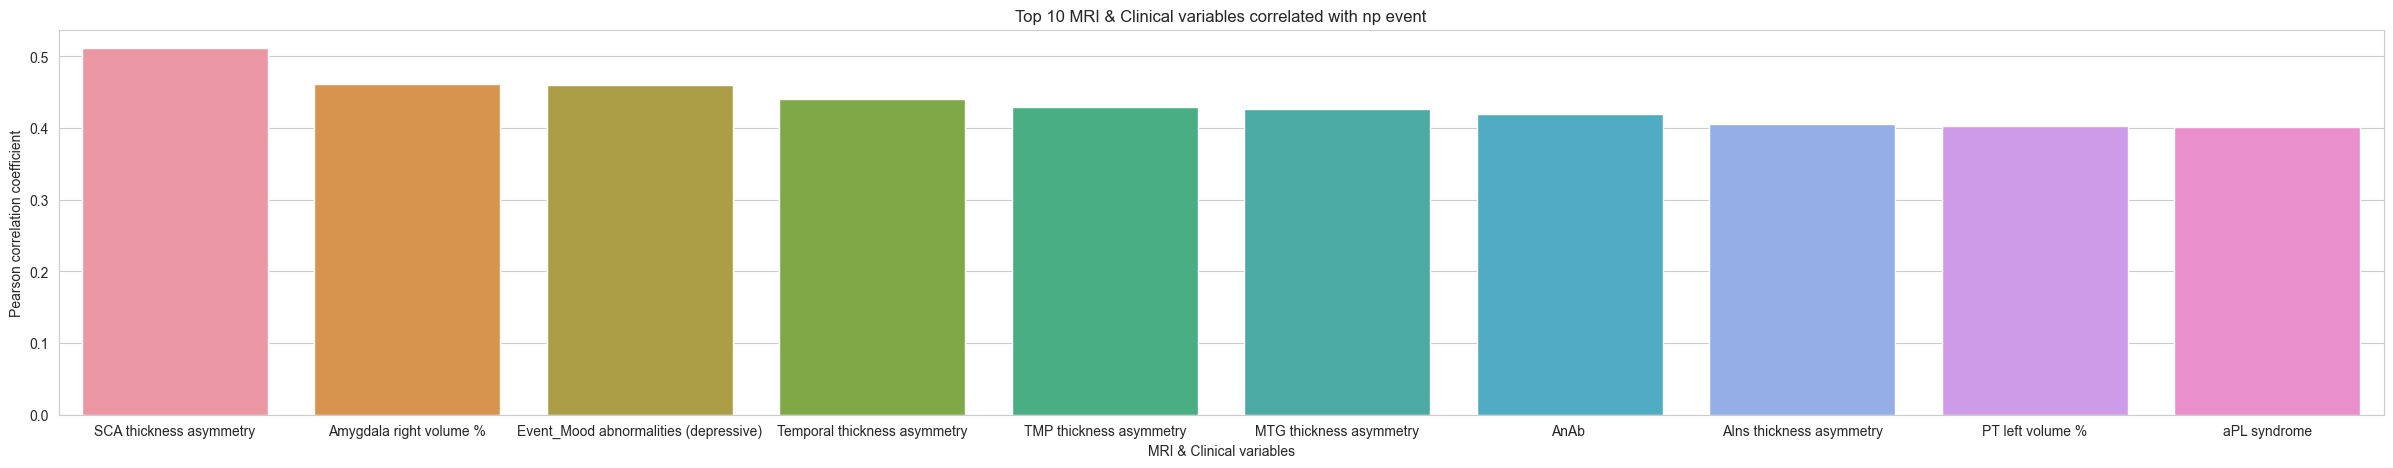

In [12]:
## -> adjust the barplot colors to make it easier to interpret the correlations.

# Select the row of the correlation matrix corresponding to 'result'
pearson_corr = pearson_corr.loc['result',:]

# Sort the correlations in descending order
pearson_corr = pearson_corr.sort_values(ascending=False)

# Select the top 10 correlated variables
top_10_corr = pearson_corr.iloc[2:12]

# Plot the top 10 correlations using a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(30,5))
ax = sns.barplot(x=top_10_corr.index, y=top_10_corr.values)
plt.title('Top 10 MRI & Clinical variables correlated with np event')
plt.xlabel('MRI & Clinical variables')
plt.ylabel('Pearson correlation coefficient')
plt.show()

## Check for Normality and Homogeneity

In [13]:
from scipy.stats import shapiro, levene
# Select the numeric columns
numeric_cols = df.iloc[:, :61].select_dtypes(include=['float64', 'int64']).columns.tolist()
# Shapiro-Wilk test for normality
for col in numeric_cols:
    stat, p = shapiro(df[col])
    alpha = 0.05
    if p > alpha:
        print(f"{col}: sample looks Gaussian (fail to reject H0)")
    else:
        print(f"{col}: sample does not look Gaussian (reject H0)")

# Levene's test for homogeneity of variances
group1 = df[df['result'] == 0]['Disease duration (months)']
group2 = df[df['result'] == 1]['Disease duration (months)']
stat, p = levene(group1, group2)
alpha = 0.05
if p > alpha:
    print("The variances of the two groups are homogeneous (fail to reject H0)")
else:
    print("The variances of the two groups are not homogeneous (reject H0)")


Disease duration (months): sample does not look Gaussian (reject H0)
SLEDAI-2k (at the time of NP event): sample does not look Gaussian (reject H0)
PGA (at the time of fMRI): sample does not look Gaussian (reject H0)
SLICC-DI (at the time of NP event): sample does not look Gaussian (reject H0)
anti-dsDNA Titre  (0=absent; 1=present) ): sample does not look Gaussian (reject H0)
anti-dsDNA Titre  (insert NV here <7 ): sample does not look Gaussian (reject H0)
Anti-Ro/SSA: sample does not look Gaussian (reject H0)
Anti-La/SSB: sample does not look Gaussian (reject H0)
Anti-RNP: sample does not look Gaussian (reject H0)
anti-Sm: sample does not look Gaussian (reject H0)
C3 (mg/dl): sample looks Gaussian (fail to reject H0)
C4 (mg/dl): sample looks Gaussian (fail to reject H0)
aPL syndrome: sample does not look Gaussian (reject H0)
LAC: sample does not look Gaussian (reject H0)
aCL IgG: sample does not look Gaussian (reject H0)
aCL IgM: sample does not look Gaussian (reject H0)
aB2GPI IgG: 

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Non-Normal Data

## Welch’s t-test (t-test equivalent for non-normal data)

In [15]:
# Perform a Welch's t-test
NP = df.query('result == 1')['Abnormal Appearing White Matter volume cm3']
N_NP = df.query('result == 0')['Abnormal Appearing White Matter volume cm3']
t_stat, p_val = stats.ttest_ind(NP, N_NP, equal_var=False)

# Print the results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the results
if p_val < 0.05:
    print("There is a significant difference between the means of the two groups.")
else:
    print("There is no significant difference between the means of the two groups.")

t-statistic: 0.7999
p-value: 0.4313
There is no significant difference between the means of the two groups.


In [16]:
# Define the columns to test
columns_to_test = df.columns[:55]

# Create an empty dataframe to store the t-test results
#t_test_results = pd.DataFrame(columns=['Variable', 'T-statistic', 'p-value'])

relevant_columns = []

## Iterate over the columns
for column in columns_to_test:
    # Check if the column contains only numeric data
    if np.issubdtype(df[column].dtype, np.number):
        # Select the data for the two groups
        group1 = df[df['result'] == 0][column]
        group2 = df[df['result'] == 1][column]

        # Perform a Welch's t-test
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

        # Print the results
        # Check if the p-value is below the significance level
        if p_val < 0.05:
            # Add the column to the list of relevant columns
            relevant_columns.append(column)
            
# Print the final list of relevant columns
print(f"Statistically significant: {relevant_columns}")

Statistically significant: ['aPL syndrome', 'AnAb ', 'Anti-Rib-P', 'NP-SLE']


/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_6874/2942865363.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)


## Wilcoxon rank-sum test to compare continuous variables among groups

Wilcoxon rank-sum test results:
Statistic: 3.8146448263914623
P-value: 0.0001363789376650375


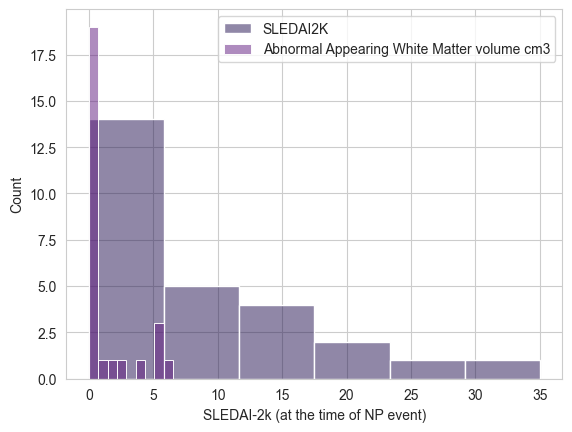

In [17]:
from scipy.stats import ranksums

# Choose the two variables for the test
var1 = df['SLEDAI-2k (at the time of NP event)']
var2 = df['Abnormal Appearing White Matter volume cm3']

# Perform the Wilcoxon rank-sum test
statistic, pvalue = ranksums(var1, var2)

# Print the test results
print("Wilcoxon rank-sum test results:")
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

# Plot the distribution of the two variables
sns.histplot(df, x ="SLEDAI-2k (at the time of NP event)", label="SLEDAI2K", alpha = 0.5)
sns.histplot(df, x ="Abnormal Appearing White Matter volume cm3", label = "Abnormal Appearing White Matter volume cm3", alpha = 0.5)
plt.legend()
plt.show()

## Fisher’s exact to compare categorical variables among groups

In [18]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['result']
var_2 = df['AnAb ']

# Bin variables into two categories
var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 7.00
P-value: 0.0461


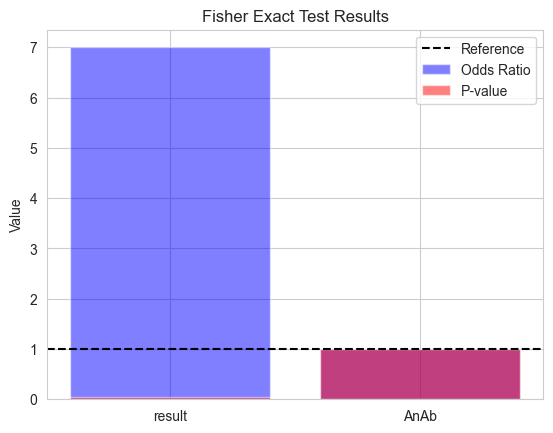

In [19]:
# Plot results
# Create a bar chart to display odds ratio and p-value
plt.bar(['result', 'AnAb'], [odds_ratio, 1], color='blue', alpha=0.5)
plt.bar(['result', 'AnAb'], [p_value, 1], color='red', alpha=0.5)

# Add a reference line at y=1
plt.axhline(y=1, color='black', linestyle='--')

# Set the y-axis label and chart title
plt.ylabel('Value')
plt.title('Fisher Exact Test Results')

# Add a legend
plt.legend(['Reference', 'Odds Ratio', 'P-value'])

# Display the chart
plt.show()

## Kruskal-Wallis test

In [20]:
from scipy.stats import shapiro, kruskal

# Identify columns with interval data type 
interval_cols = [col for col in df.columns if pd.api.types.is_interval_dtype(df[col])]

# Handle interval data type
for col in interval_cols:
    df[col] = df[col].apply(lambda x: x.mid)

# Convert variables to float and fill missing values with the mean
df = df.astype(float)
df.fillna(df.mean(), inplace=True)

# Select variables of interest
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume cm3'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'
mri_cols = list(df.columns[50:])

# Test for normality and perform Kruskal-Wallis test if normality is rejected
kruskal_results = {}
for var in df.columns:
    if var in [neurocog_cols + [prednisone, lesion_load, sledai]] + mri_cols:
        # Test for normality
        shapiro_pvalue = shapiro(df[var])[1]
        if shapiro_pvalue < 0.05:
            # Perform Kruskal-Wallis test if normality is rejected
            kruskal_pvalue = kruskal(df[df['result'] == 0][var], df[df['result'] == 1][var])[1]
            if kruskal_pvalue < 0.05:
                kruskal_results[var] = kruskal_pvalue
                
# Print the variables that show significant differences between groups
for var, p_value in kruskal_results.items():
    print(f"{var}: Kruskal-Wallis test p-value = {p_value}")



Inf. Lateral Ventricle left volume %: Kruskal-Wallis test p-value = 0.02898598091688467
SCA left thickness mm: Kruskal-Wallis test p-value = 0.04154006700988525
Temporal thickness asymmetry: Kruskal-Wallis test p-value = 0.04154006700988525
MTG thickness asymmetry: Kruskal-Wallis test p-value = 0.036922061893465294
TMP thickness asymmetry: Kruskal-Wallis test p-value = 0.01011460727458917
AnG right thickness mm: Kruskal-Wallis test p-value = 0.004885056354422506
AnG right thickness norm.: Kruskal-Wallis test p-value = 0.03274867964999203
MOG left thickness mm: Kruskal-Wallis test p-value = 0.03274867964999203
MOG left thickness norm.: Kruskal-Wallis test p-value = 0.04154006700988525
result: Kruskal-Wallis test p-value = 3.4141735772975244e-07
Event_Mood abnormalities (depressive): Kruskal-Wallis test p-value = 0.01915824743246051
Event_nan: Kruskal-Wallis test p-value = 3.4141735772975244e-07


/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Normal Data

## T-Test

In [31]:
from scipy.stats import ttest_ind

#df['var1_group'] = pd.cut(df['SLICC-DI (at the time of NP event)'], bins=2)
#df['var2_group'] = pd.cut(df['SLEDAI-2k (at the time of NP event)'], bins=2)

# Group the data by the bin labels and calculate mean and standard deviation for var3 and var4
grouped = df.groupby(['Disease duration (months)', 'C3 (mg/dl)']).agg({'Abnormal Appearing White Matter volume cm3': ['mean', 'std'], 'Grey Matter (GM) volume cm3': ['mean', 'std']})
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

# Perform t-test on var3 and var4 between the groups
for idx in grouped.index:
    group1 = df.loc[(df['Disease duration (months)'] == idx[0]) & (df['C3 (mg/dl)'] == idx[1]), 'Abnormal Appearing White Matter volume cm3']
    group2 = df.loc[(df['Disease duration (months)'] != idx[0]) | (df['C3 (mg/dl)'] != idx[1]), 'Abnormal Appearing White Matter volume cm3']
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"Group {idx}: t-statistic={t_stat:.2f}, p-value={p_value:.2f}")
    group1 = df.loc[(df['Disease duration (months)'] == idx[0]) & (df['C3 (mg/dl)'] == idx[1]), 'Grey Matter (GM) volume cm3']
    group2 = df.loc[(df['Disease duration (months)'] != idx[0]) | (df['C3 (mg/dl)'] != idx[1]), 'Grey Matter (GM) volume cm3']
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"Group {idx}: t-statistic={t_stat:.2f}, p-value={p_value:.2f}")


Group (-1.0073258064670203, 31.0): t-statistic=nan, p-value=nan
Group (-1.0073258064670203, 31.0): t-statistic=nan, p-value=nan
Group (-0.9574717751883651, 94.0): t-statistic=nan, p-value=nan
Group (-0.9574717751883651, 94.0): t-statistic=nan, p-value=nan
Group (-0.8942659083188823, 84.0): t-statistic=nan, p-value=nan
Group (-0.8942659083188823, 84.0): t-statistic=nan, p-value=nan
Group (-0.8705771677545104, 128.0): t-statistic=nan, p-value=nan
Group (-0.8705771677545104, 128.0): t-statistic=nan, p-value=nan
Group (-0.785513053909721, 96.0): t-statistic=nan, p-value=nan
Group (-0.785513053909721, 96.0): t-statistic=nan, p-value=nan
Group (-0.7618243133453493, 95.0): t-statistic=nan, p-value=nan
Group (-0.7618243133453493, 95.0): t-statistic=nan, p-value=nan
Group (-0.6950651353912106, 78.0): t-statistic=nan, p-value=nan
Group (-0.6950651353912106, 78.0): t-statistic=nan, p-value=nan
Group (-0.6832207651090247, 57.0): t-statistic=nan, p-value=nan
Group (-0.6832207651090247, 57.0): t-sta

/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_6874/3253102937.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(group1, group2)
/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_6874/3253102937.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results

In [23]:
# Select the columns you want to test
columns_to_test = ['C3 (mg/dl)', 'Abnormal Appearing White Matter volume cm3', 'Disease duration (months)', 'Intracranial Cavity (IC) volume cm3']

# Conduct the hypothesis tests
p_values = {}
for column in columns_to_test:
    t_statistic, p_value = stats.ttest_1samp(df[column], 0)
    p_values[column] = p_value

# Print the p-values
print(p_values)

{'SLEDAI-2k (at the time of NP event)': 0.9999999999999999, 'Abnormal Appearing White Matter volume cm3': 0.9999999999999998, 'Disease duration (months)': 0.9999999999999996, 'Prednisone  (mg equivalent)': 0.9999999999999996}


In [24]:
from statsmodels.sandbox.stats.multicomp import multipletests

# Apply the Holm-Bonferroni correction
_, p_values_corrected, _, _ = multipletests(list(p_values.values()), method='holm')

# Print the corrected p-values
print(p_values_corrected)

[1. 1. 1. 1.]


/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_6874/2584243142.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)


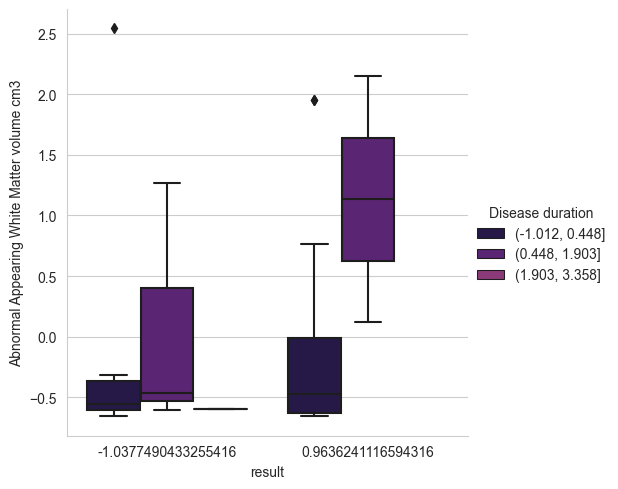

In [25]:
# Plot stats
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='result', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')

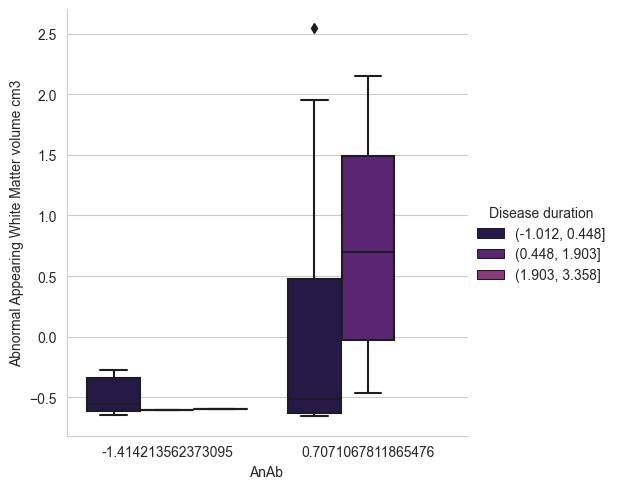

In [26]:
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='AnAb ', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')

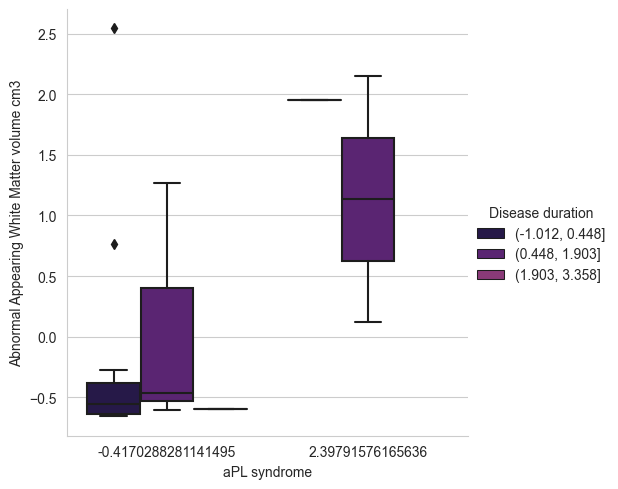

In [27]:
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='aPL syndrome', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')

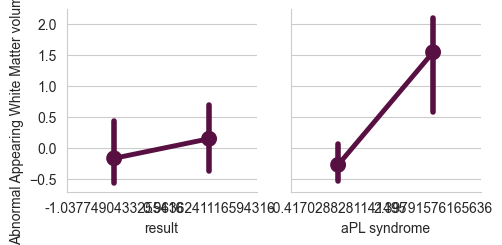

In [28]:
g = sns.PairGrid(df, y_vars='Abnormal Appearing White Matter volume cm3',x_vars=['result','aPL syndrome'])
g.map(sns.pointplot, scale=1.3, errwidth=4, color='xkcd:plum')

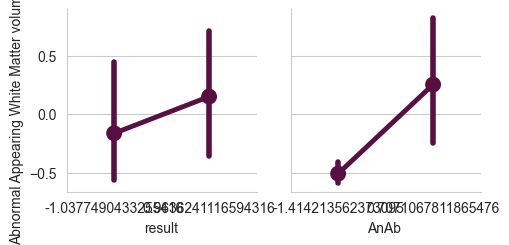

In [29]:
g = sns.PairGrid(df, y_vars='Abnormal Appearing White Matter volume cm3',x_vars=['result','AnAb '])
g.map(sns.pointplot, scale=1.3, errwidth=4, color='xkcd:plum')

In [30]:
# Define the columns to test
columns_to_test = df.columns[56:937]

# Create an empty dataframe to store the t-test results
#t_test_results = pd.DataFrame(columns=['Variable', 'T-statistic', 'p-value'])

relevant_columns = []

## Iterate over the columns
for column in columns_to_test:
    # Check if the column contains only numeric data
    if np.issubdtype(df[column].dtype, np.number):
        # Select the data for the two groups
        group1 = df[df['result'] == 0][column]
        group2 = df[df['result'] == 1][column]

        # Perform a Welch's t-test
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

        # Print the results
        # Check if the p-value is below the significance level
        if p_val < 0.05:
            # Add the column to the list of relevant columns
            relevant_columns.append(column)
            
# Print the final list of relevant columns
print(f"Statistically significant: {relevant_columns}")

Statistically significant: []


## Perfom One-Way ANOVA test

In [ ]:
# Perform the one-way ANOVA test

cols_to_test = df[['Brain (WM+GM) volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

In [ ]:
## perform post-hoc tests (e.g., Tukey's HSD test) to determine which specific groups are different from each other.

import statsmodels.stats.multicomp as mc

# Create a list of your group labels
group_labels = ['Event', 'N_Event']

# Perform Tukey's HSD test
tukey = mc.MultiComparison(df['Abnormal Appearing White Matter volume cm3'], df['result'])
tukey_result = tukey.tukeyhsd()

# Print the results
print(tukey_result)

In [ ]:
# Perform the one-way ANOVA test

cols_to_test = df[['Abnormal Appearing White Matter volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

In [ ]:
# Perform the one-way ANOVA test

cols_to_test = df[['Cerebro Spinal Fluid (CSF) volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

In [ ]:
# Perform the one-way ANOVA test

cols_to_test = df[['Grey Matter (GM) volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

## Chi Square

In [ ]:
from scipy.stats import chi2_contingency

# Select the categorical variable to analyze
cat_var = df['aPL syndrome']

# Create a contingency table
cont_table = pd.crosstab(cat_var, df['result'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square value: {chi2:.2f}")
print(f"P-value: {pval:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)

In [ ]:
from scipy.stats import chi2_contingency

# Select the categorical variable to analyze
cat_var = df['AnAb ']

# Create a contingency table
cont_table = pd.crosstab(cat_var, df['result'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square value: {chi2:.2f}")
print(f"P-value: {pval:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)

## F-Distribution

In [ ]:
# Calculate F-statistic using stats.f_oneway
F, p = stats.f_oneway(df[df['result']==0]['Abnormal Appearing White Matter volume cm3'],
                      df[df['result']==1]['Abnormal Appearing White Matter volume cm3'])

# Define degrees of freedom
dfn = len(df[df['result']==0]['Abnormal Appearing White Matter volume cm3']) - 1
dfd = len(df[df['result']==1]['Abnormal Appearing White Matter volume cm3']) - 1

# Define x range for plotting
x = np.linspace(0, 5, 1000)

# Calculate F-distribution for given degrees of freedom
y = stats.f.pdf(x, dfn, dfd)

# Plot F-distribution
plt.plot(x, y)
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title('F-distribution for two variables')
plt.axvline(F, color='r', linestyle='--', label='F-statistic')
plt.legend()
plt.show()

## Neurocognitive z-scores of specific clinical domains and total neurocognitive z-score were correlated with lesion load across the subject groups using Pearson correlation. Adjusted for prednisone therapy (mg/day) and SLEDAI as partial correlations

In [ ]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume cm3'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'

# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['result'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='result', y=lesion_load, covar=[prednisone, sledai])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'result vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['result'], df[lesion_load], c=colors)
    plt.xlabel('result')
    plt.ylabel(lesion_load)
    plt.title(f'result vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='result', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

## Adjustment for covariates by analysis of covariance (ANCOVA)

In [ ]:
# define the dependent and independent variables
y = df['result']
X = df[['SCA thickness asymmetry', 'Temporal thickness asymmetry', 'Anti-Rib-P','TMP thickness asymmetry', 'MTG thickness asymmetry', 'AnAb ','AIns thickness asymmetry', 'SOG thickness asymmetry', 'Inf. Lateral Ventricle left volume cm3']]
#print(X)
# check for missing or infinite values in the independent variables
#if X.isnull().values.any() or np.isinf(X).any():
   # raise ValueError("The independent variables contain missing or infinite values.")

# add a constant to the independent variables (required for regression analysis)
X = sm.add_constant(X)

# fit the multiple regression model
model = sm.OLS(y, X).fit()

# print the summary of the regression model
print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop the constant column from X
X_no_constant = X.drop('const', axis=1)

# calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_no_constant.values, i) for i in range(X_no_constant.shape[1])]
vif["features"] = X_no_constant.columns

# print the VIF results
print(vif)
print("The more  VIF increases, the less reliable  regression results are going to be")

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# select the top 5 independent variables based on f_regression
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

# get the selected features
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)